### A*

In [47]:
op=set()
cl=set()
d={}
p={}
graph = {
    'A': [('C', 12), ('D', 6)],
    'B': [('C', 10),('E',7)],
    'C': [('G', 5)],
    'D': [('G', 16)],
    'E': [('C',2)],
    'S': [('A', 4),('B',3)]    
}
def h(n):
    H_dist = {
            'A': 12,
            'B': 11,
            'C': 4,
            'D': 11,
            'E': 6,
            'S': 14,
            'G': 0,
            }
    return H_dist[n]
def neigh(n):
    if n in graph:
        return graph[n]
    else:
        return None

In [48]:
def astar(start,stop):
    op=set(start)
    d[start]=0
    p[start]=start
    while len(op)>0:
        n=None
        for i in op:
            if n==None or d[i]+h(i)<d[n]+h(n):
                n=i
        if n==stop or graph[n]==None:
            pass
        else:
            for (m,w) in neigh(n):
                if m not in op and m not in cl:
                    op.add(m)
                    p[m]=n
                    d[m]=d[n]+w
                else:
                    if d[m]>d[n]+w:
                        d[m]=d[n]+w
                        p[m]=n
                        if m in cl:
                            cl.remove(m)
                            op.add(m)
        if n==None:
            print('path does not exist')
            return None
        if n==stop:
            path=[]
            while p[n]!=n:
                path.append(n)
                n=p[n]
            path.append(start)
            path.reverse()
            print('path found {}'.format(path))
            return path
        op.remove(n)
        cl.add(n)
    print('path does not exist ')
    return None


In [49]:
astar('S','G')

path found ['S', 'B', 'E', 'C', 'G']


['S', 'B', 'E', 'C', 'G']

In [46]:
graph={'S':[('A',1),('G',12)],
      'A':[('B',3),('C',1)],
      'B':[('D',3)],
      'C':[('D',1),('G',2)],
      'D':[('G',3)],
      'G':None}
heu = {'S':4,'A':2,'B':6,'C':2,'D':3,'G':0}


### AO*

In [1]:
class Graph:
    def __init__(self,graph,heu,sn):
        self.graph = graph
        self.h=heu
        self.start=sn
        self.par={}
        self.sta={}
        self.sg={}
    def applyaostar(self):
        self.aostar(self.start,False)
    def getneigh(self,v):
        print('neigh  ',v)
        print(self.graph.get(v,'  '))
        return self.graph.get(v,'')
    def getsta(self,v):
        print('status   ',self.sta.get(v,0))
        return self.sta.get(v,0)
    def setsta(self,v,val):
        self.sta[v]=val
    def gethval(self,n):
        return self.h.get(n,0)
    def sethval(self,n,val):
        self.h[n]=val
    def printsol(self):
        print("for graph soln traverse the graph",self.start)
        print("------")
        print(self.sg)
        print("------------------")
    def computemincost(self,v):
        mincost=0
        costtochild={}
        costtochild[mincost]=[]
        flag=True
        for nodeinfo in self.getneigh(v):
            cost=0
            nodelist=[]
            for c,weight in nodeinfo:
                cost+=self.gethval(c)+weight
                nodelist.append(c)
            if flag==True:
                mincost=cost
                costtochild[mincost]=nodelist
                flag=False
            else:
                if mincost>cost:
                    mincost=cost
                    costtochild[mincost]=nodelist
        return mincost,costtochild[mincost]
    def aostar(self,v,backtracking):
        print("heuristic value",self.h)
        print("solution graph",self.sg)
        print("processing node:",v)
        print("-----------------")
        if self.getsta(v)>=0:
            mincost,childnodelist=self.computemincost(v)
            self.sethval(v,mincost)
            self.setsta(v,len(childnodelist))
            solved=True
            for child in childnodelist:
                self.par[child]=v
                if self.getsta(child)!=-1:
                    solved = solved & False
        if solved == True:
            self.setsta(v,-1)
            self.sg[v]=childnodelist
        if v!=self.start:
            self.aostar(self.par[v],True)
        if backtracking == False:
            for child in childnodelist:
                self.setsta(child,0)
                self.aostar(child,False)
h1={'A':1,'B':6,'C':2,'D':12,'E':2,'F':1,'G':5,'H':7,'I':7,'J':1}
graph1={'A':[[('B',1),('C',1)],[('D',1)]],
       }
g1=Graph(graph1,h1,'A')
g1.applyaostar()
g1.printsol()
print("heuristic value",g1.h)
print("solution graph",g1.sg)


heuristic value {'A': 1, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1}
solution graph {}
processing node: A
-----------------
status    0
neigh   A
[[('B', 1), ('C', 1)], [('D', 1)]]
status    0
status    0
heuristic value {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1}
solution graph {}
processing node: B
-----------------
status    0
neigh   B
  
heuristic value {'A': 10, 'B': 0, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1}
solution graph {'B': []}
processing node: A
-----------------
status    2
neigh   A
[[('B', 1), ('C', 1)], [('D', 1)]]
status    -1
status    0
heuristic value {'A': 4, 'B': 0, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1}
solution graph {'B': []}
processing node: C
-----------------
status    0
neigh   C
  
heuristic value {'A': 4, 'B': 0, 'C': 0, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1}
solution graph {'B': [], 'C': []}
processing node: A
--------

In [28]:
class Graph:
    def __init__(s,g,h,st):
        s.h=h
        s.g=g
        s.st=st
        s.sg={}
        s.p={}
        s.sta={}
    def applyao(s):
        s.aostar(s.st,False)
    def aostar(s,v,back):
        print(s.h)
        print(s.sg)
        print(v)
        if s.getsta(v)>=0:
            mcost,childnode=s.mincost(v)
            s.seth(v,mcost)
            s.setsta(v,len(childnode))
            solved=True
            for i in childnode:
                s.p[i]=v
                if s.getsta(i)!=-1:
                    solved=solved&False
        if solved ==True:
            s.setsta(v,-1)
            s.sg[v]=childnode
        if v!=s.st:
            s.aostar(s.p[v],True)
        if back==False:
            for i in childnode:
                s.setsta(i,0)
                s.aostar(i,False)
    def mincost(s,v):
        mcost=0
        childnode={}
        childnode[mcost]=[]
        flag=True
        for i in s.getneigh(v):
            cost=0
            nodelist=[]
            for c,w in i:
                cost+=s.geth(c)+w
                nodelist.append(c)
                print('1 ',nodelist)
            if flag==True:
                mcost=cost
                childnode[mcost]=nodelist
                flag=False
                print('2 ',nodelist)
                print(childnode)
            else:
                if mcost>cost:
                    mcost=cost
                    childnode[mcost]=nodelist
                    print('3 ',nodelist)
                    print('childnode',childnode[mcost])
        return mcost,childnode[mcost]
    def printsol(s):
        print(s.st)
        print(s.sg)
    def getneigh(s,v):
        return s.g.get(v,'')
    def getsta(s,v):
        return s.sta.get(v,0)
    def setsta(s,v,val):
        s.sta[v]=val
    def geth(s,v):
        return s.h.get(v,0)
    def seth(s,v,val):
        s.h[v]=val
h1={'A': 1, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 6, 'I': 7, 'J': 1}
graph1={'A': [[('B', 1), ('C', 1)], [('D', 1)]],

       }
g1=Graph(graph1,h1,'A')
g1.applyao()
g1.printsol()
print("heuristic value",g1.h)
print("solution graph",g1.sg)
            
    

{'A': 1, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 6, 'I': 7, 'J': 1}
{}
A
1  ['B']
1  ['B', 'C']
2  ['B', 'C']
{0: [], 10: ['B', 'C']}
1  ['D']
{'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 6, 'I': 7, 'J': 1}
{}
B
{'A': 10, 'B': 0, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 6, 'I': 7, 'J': 1}
{'B': []}
A
1  ['B']
1  ['B', 'C']
2  ['B', 'C']
{0: [], 4: ['B', 'C']}
1  ['D']
{'A': 4, 'B': 0, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 6, 'I': 7, 'J': 1}
{'B': []}
C
{'A': 4, 'B': 0, 'C': 0, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 6, 'I': 7, 'J': 1}
{'B': [], 'C': []}
A
1  ['B']
1  ['B', 'C']
2  ['B', 'C']
{0: [], 2: ['B', 'C']}
1  ['D']
A
{'B': [], 'C': [], 'A': ['B', 'C']}
heuristic value {'A': 2, 'B': 0, 'C': 0, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 6, 'I': 7, 'J': 1}
solution graph {'B': [], 'C': [], 'A': ['B', 'C']}


### CE

In [34]:
['&']*6

['&', '&', '&', '&', '&', '&']

In [38]:
g=[['&' for i in range(6)]for i in range(6)]
g

[['&', '&', '&', '&', '&', '&'],
 ['&', '&', '&', '&', '&', '&'],
 ['&', '&', '&', '&', '&', '&'],
 ['&', '&', '&', '&', '&', '&'],
 ['&', '&', '&', '&', '&', '&'],
 ['&', '&', '&', '&', '&', '&']]

In [65]:
import csv

In [66]:
file = open('lab2.csv')

In [67]:
data=list(csv.reader(file))[1:]
data

[['sunny', 'warm', 'normal', 'strong', 'warm', 'same', 'yes'],
 ['sunny', 'warm', 'high', 'strong', 'warm', 'same', 'yes'],
 ['cloudy', 'cold', 'high', 'strong', 'warm', 'change', 'no'],
 ['sunny', 'warm', 'high', 'strong', 'cool', 'change', 'yes']]

In [68]:
con=[]
tar=[]
for i in data:
    con.append(i[:-1])
    tar.append(i[-1])
con,tar

([['sunny', 'warm', 'normal', 'strong', 'warm', 'same'],
  ['sunny', 'warm', 'high', 'strong', 'warm', 'same'],
  ['cloudy', 'cold', 'high', 'strong', 'warm', 'change'],
  ['sunny', 'warm', 'high', 'strong', 'cool', 'change']],
 ['yes', 'yes', 'no', 'yes'])

In [69]:
sp=['0']*len(con[0])
ge=[['?' for i in range(len(sp))]for i in range(len(sp))]
sp,ge

(['0', '0', '0', '0', '0', '0'],
 [['?', '?', '?', '?', '?', '?'],
  ['?', '?', '?', '?', '?', '?'],
  ['?', '?', '?', '?', '?', '?'],
  ['?', '?', '?', '?', '?', '?'],
  ['?', '?', '?', '?', '?', '?'],
  ['?', '?', '?', '?', '?', '?']])

In [70]:
for i,ins in enumerate(con):
    if tar[i]=='yes':
        for x in range(len(sp)):
            if sp[x]=='0':
                sp[x]=ins[x]
            elif ins[x]!=sp[x]:
                sp[x]='?'
                ge[x][x]='?'
    if tar[i]=='no':
        for x in range(len(sp)):
            if ins[x]!=sp[x]:
                ge[x][x]=sp[x]
            else:
                ge[x][x]='?'

In [71]:
indi=[i for i,val in enumerate(ge) if val==['?']*len(sp)]
indi,ge

([2, 3, 4, 5],
 [['sunny', '?', '?', '?', '?', '?'],
  ['?', 'warm', '?', '?', '?', '?'],
  ['?', '?', '?', '?', '?', '?'],
  ['?', '?', '?', '?', '?', '?'],
  ['?', '?', '?', '?', '?', '?'],
  ['?', '?', '?', '?', '?', '?']])

In [72]:
for i in indi:
    ge.remove(['?']*len(sp))

In [73]:
sp,ge

(['sunny', 'warm', '?', 'strong', '?', '?'],
 [['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?', '?']])

### ID3

In [6]:
import csv
import math
def major_class(data,attributes,target):
    freq={}
    index=attributes.index(target)
    for t in data:
        if t[index] in freq:
            freq[t[index]]+=1
        else:
            freq[t[index]]=1
    m=0
    major=""
    for key in freq.keys():
        if freq[key]>m:
            m=freq[key]
            major=key
    return major
def entropy(attributes,data,targetAttr):
    freq={}
    data_entropy=0.0
    i=0
    for entry in attributes:
        if targetAttr==entry:
            break
        i+=1
    for entry in data:
        if entry[i]=='playtennis':
            pass
        else:
            if entry[i] in freq:
                freq[entry[i]]+=1.0
            else:
                freq[entry[i]]=1.0
    for f in freq.values():
        data_entropy+=(-f/len(data))*math.log(f/len(data),2)
    return data_entropy

def info_gain(data,attributes,targetAttr,attr):
    freq={}
    subset_entropy=0.0
    i=attributes.index(attr)
    for entry in data:
        if entry[i]==attr:
            pass
        else:
            if entry[i] in freq:
                freq[entry[i]]+=1.0
            else:
                freq[entry[i]]=1
    for val in freq.keys():
        p=sum(freq.values())
        val_prob=freq[val]/(p)
        data_subset=[entry for entry in data if entry[i]==val]
        subset_entropy+=val_prob+entropy(attributes,data_subset,targetAttr)
    data_subset=[entry for entry in data if entry[0]!='outlook']
    info_gain=entropy(attributes,data_subset,targetAttr)*subset_entropy
    return info_gain

def attr_choose(data,attributes,target):
    best=attributes[0]
    max_gain=0
    for attr in attributes:
        if attr!=target:
            new_gain=info_gain(data,attributes,target,attr)
            if new_gain>max_gain:
                max_gain=new_gain
                best=attr
    return best

def get_values(data,attributes,attr):
    i=attributes.index(attr)
    values=[]
    for entry in data:
        if entry[i]==attr:
            pass
        else:
            if entry[i] not in values:
                values.append(entry[i])
    return values

def get_data(data,attributes,best,val):
    new_data=[]
    i=attributes.index(best)
    for entry in data:
        if entry[i]==val:
            new_entry=[]
            for j in range(len(entry)):
                if j!=i:
                    new_entry.append(entry[j])
            new_data.append(new_entry)
    return new_data

def build_tree(data,attributes,target):
    vals=[record[attributes.index(target)]for record in data]
    default = major_class(data,attributes,target)
    if not data or (len(attributes)-1)<=0:
        return default
    elif vals.count(vals[0]==len(vals)):
        return vals[0]
    else:
        best=attr_choose(data,attributes,target)
        tree = {best:{}}
        for val in get_values(data,attributes,best):
            new_data=get_data(data,attributes,best,val)
            new_attr=attributes[:]
            new_attr.remove(best)
            subtree=build_tree(new_data,new_attr,target)
            tree[best][val]=subtree
    return tree
def test(attributes,instances,tree):
    attribute = next(iter(tree))
    i = attributes.index(attribute)
    if instances[i] in tree[attribute].keys():
        result = tree[attribute][instance[i]]
        if instance(result,dict):
            return test(attributes,instance,result)
        else:
            return result
    else:
        return 'Null'
def execute_decision_tree():
    data=[]
    with open('PlayTennis.csv') as tsv:
        for line in csv.reader(tsv):
            data.append(tuple(line))
    attributes=list(data[0])
    target=attributes[-1]
    training_set=[x for i,x in enumerate(data)]
    print("data set is")
    print(training_set)
    tree = build_tree(training_set,attributes,target)
    print('decision tree is given below\n')
    print(tree)
    instance = ['rainy','hot','normal','weak']
    print("*****")
    print("testing instance is ",instance)
    print("target value for the instance is ")
    res=test(attributes,instance,tree)
    print(res)
execute_decision_tree()
    
        
          
 

data set is
[('Outlook', 'Temperature', 'Humidity', 'Windy', 'PlayTennis'), ('Sunny', 'Hot', 'High', 'FALSE', 'No'), ('Sunny', 'Hot', 'High', 'TRUE', 'No'), ('Overcast', 'Hot', 'High', 'FALSE', 'Yes'), ('Rainy', 'Mild', 'High', 'FALSE', 'Yes'), ('Rainy', 'Cool', 'Normal', 'FALSE', 'Yes'), ('Rainy', 'Cool', 'Normal', 'TRUE', 'No'), ('Overcast', 'Cool', 'Normal', 'TRUE', 'Yes'), ('Sunny', 'Mild', 'High', 'FALSE', 'No'), ('Sunny', 'Cool', 'Normal', 'FALSE', 'Yes'), ('Rainy', 'Mild', 'Normal', 'FALSE', 'Yes'), ('Sunny', 'Mild', 'Normal', 'TRUE', 'Yes'), ('Overcast', 'Mild', 'High', 'TRUE', 'Yes'), ('Overcast', 'Hot', 'Normal', 'FALSE', 'Yes'), ('Rainy', 'Mild', 'High', 'TRUE', 'No')]
decision tree is given below

{'Temperature': {'Hot': {'Humidity': {'High': {'Windy': {'FALSE': {'Outlook': {'Sunny': 'No', 'Overcast': 'Yes'}}, 'TRUE': {'Outlook': {'Sunny': 'No'}}}}, 'Normal': {'Outlook': {'Overcast': {'Windy': {'FALSE': 'Yes'}}}}}}, 'Mild': {'Outlook': {'Rainy': {'Humidity': {'High': {'Wind

### LWR

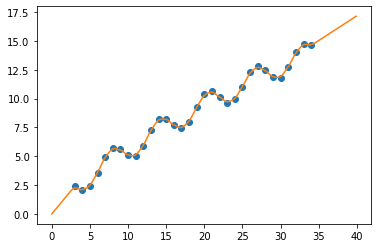

In [91]:
import numpy as np
import matplotlib.pyplot as plt
xtrain=np.array(list(range(3,35))).reshape(32,1)
ytrain=np.sin(xtrain)+xtrain**0.75
xtest=np.array([i/10 for i in range(400)]).reshape(400,1)
ytest=[]

for r in range(len(xtest)):
    w=np.diag(np.exp(-np.sum((xtrain-xtest[r])**2,axis=1)/(2*0.5**2)))
    f1=np.linalg.inv(xtrain.T.dot(w).dot(xtrain))
    params=f1.dot(xtrain.T).dot(w).dot(ytrain)
    pred=xtest[r].dot(params)
    ytest.append(pred)
plt.plot(xtrain.squeeze(),ytrain,'o')
plt.plot(xtest.squeeze(),ytest,'-') 

### KNN

ACCURACY of KNN: 0.9736842105263158
Confusion Matrix for KNN:
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Classification Results are:

Sample: [5.8 2.8 5.1 2.4]  Actual label: 2  Predicted label: 2
Sample: [6.  2.2 4.  1. ]  Actual label: 1  Predicted label: 1
Sample: [5.5 4.2 1.4 0.2]  Actual label: 0  Predicted label: 0
Sample: [7.3 2.9 6.3 1.8]  Actual label: 2  Predicted label: 2
Sample: [5.  3.4 1.5 0.2]  Actual label: 0  Predicted label: 0
Sample: [6.3 3.3 6.  2.5]  Actual label: 2  Predicted label: 2
Sample: [5.  3.5 1.3 0.3]  Actual label: 0  Predicted label: 0
Sample: [6.7 3.1 4.7 1.5]  Actual label: 1  Predicted label: 1
Sample: [6.8 2.8 4.8 1.4]  Actual label: 1  Predicted label: 1
Sample: [6.1 2.8 4.  1.3]  Actual label: 1  Predicted label: 1
Sample: [6.1 2.6 5.6 1.4]  Actual label: 2  Predicted label: 2
Sample: [6.4 3.2 4.5 1.5]  Actual label: 1  Predicted label: 1
Sample: [6.1 2.8 4.7 1.2]  Actual label: 1  Predicted label: 1
Sample: [6.5 2.8 4.6 1.5]  Actual label: 1  Predicte

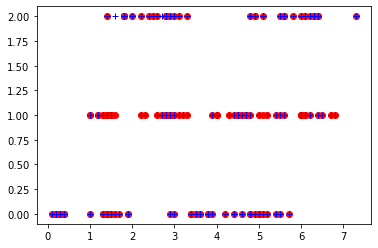

In [1]:
from sklearn.datasets import load_iris 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split   #if it didn't work, replace sklearn.model_selection with sklearn.cross_validation
import matplotlib.pyplot as plt
#%matplotlib inline                   #this is to plot the graphs in this Jupyter notebook, but not outside of it

iris_dataset=load_iris() 
X_train, X_test, y_train, y_test = train_test_split(iris_dataset["data"], iris_dataset["target"], random_state=0) #By default Train:Test ratio is 3:1

kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
prediction = kn.predict(X_test)

import sklearn.metrics as sm
print('ACCURACY of KNN:',sm.accuracy_score(y_test,prediction))
print('Confusion Matrix for KNN:\n',sm.confusion_matrix(y_test,prediction))   #Confusion matrix for Data Samples in y_test 

plt.plot(X_test,y_test,'ro')        #red colored circles represent Actual Data
plt.plot(X_test,prediction,'b+')    #Blue colored plus represent Predicted Data



#To check detailed info about the predicted data and the actual data of X_TEST 
y_pred = kn.predict(X_test)
print("Classification Results are:\n")
for i in range(0,len(X_test)):
    print("Sample:", str(X_test[i]), " Actual label:", str(y_test[i])," Predicted label:", str(y_pred[i]))

### K-means vs EM

K Means Accuracy: 0.8933333333333333
Confusion Matrix for KMeans:
 [[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]
EM Accuracy: 0.9666666666666667
Confusion Matrix for EM:
 [[50  0  0]
 [ 0 45  5]
 [ 0  0 50]]


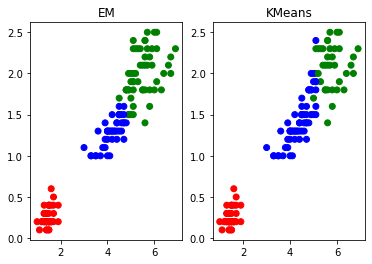

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd 
import numpy as np

np.random.seed(2)       #the start number of the random number generator with 2.
iris=load_iris() 
x=pd.DataFrame(iris.data)
y=pd.DataFrame(iris.target)
colormap=np.array(['red','blue','green'])

from sklearn.cluster import KMeans 
kmeans=KMeans(n_clusters=3).fit(x) 
plt.subplot(1,2,2) 
plt.title("KMeans") 
plt.scatter(x[2],x[3],c=colormap[kmeans.labels_])
KM_Cluster=kmeans.predict(x)

import sklearn.metrics as sm 
print('K Means Accuracy:',sm.accuracy_score(y,KM_Cluster)) 
print('Confusion Matrix for KMeans:\n',sm.confusion_matrix(y,KM_Cluster))

from sklearn.mixture import GaussianMixture     #if it didn't work, replace GaussianMixture with GMM
gm=GaussianMixture(n_components=3).fit(x) 
ycluster=gm.predict(x) 

plt.subplot(1,2,1) 
plt.title("EM") 
plt.scatter(x[2],x[3],c=colormap[ycluster]) 
print('EM Accuracy:',sm.accuracy_score(y,ycluster)) 
print('Confusion Matrix for EM:\n',sm.confusion_matrix(y,ycluster))

### NCB

In [4]:
# load the daibetis dataset
import csv
file=open('Diabetis_data.csv')
data=list(csv.reader(file))
X=[]
y=[]
# store the feature matrix (X) and response vector (y)
for row in data:
    X.append(row[:-1])
    y.append(row[-1])
print(len(X))
print(len(y))

# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("Number of training Instances:",len(X_train))
print("Number of testing Instances:",len(y_test))

# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# making predictions on the testing set
y_pred = gnb.predict(X_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
#print(metrics.classification_report(y_test, y_pred))
metrics.confusion_matrix(y_test, y_pred)

768
768
Number of training Instances: 537
Number of testing Instances: 231
Gaussian Naive Bayes model accuracy(in %): 78.35497835497836


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


array([[128,  18],
       [ 32,  53]], dtype=int64)

### BP

In [5]:
from random import random,seed,randint
from pprint import pprint
def initialize(n_inputs,n_hidden,n_output):
    network=[]
    hidden_layer=[{'w':[random() for i in range(n_inputs+1)]} for i in range(n_hidden)] #Initialize Weights and Biases for hidden layers
    network.append(hidden_layer)
    output_layer=[{'w':[random() for i in range(n_hidden+1)]} for i in range(n_output)] #Initialize Weights and Biases for output layer
    network.append(output_layer)
    return network
def activate(w,i):
    activation=w[-1] #Bias value is -1
    for x in range(len(w)-1):
        activation+=w[x]*i[x] #WX similar to WiXi + Bias ie activation=activation + Wixi
        return activation #WX+B
from math import exp
def sigmoid(a):
    return 1/(1+exp(-a))
def forward_prop(network,row):
    inputs=row
    for layer in network:
        new_inputs=[]
        for neuron in layer:
            activation=activate(neuron['w'],inputs) #Compute Activations
            neuron['output']=sigmoid(activation) #Compute Sigmoid
            new_inputs.append(neuron['output']) #Adds it to the output layer
        inputs=new_inputs #new_inputs values now becomes the input
    return inputs
def sigmoid_derivative(output):
    return output * (1-output) #Derivative of 1/(1+e^-x)
def backprop(network,expected): #expected is our expected output value we'd use to compute the error
    for i in reversed(range(len(network))): #Prints the list ie "Network" in reversed order
        layer=network[i] #network contains what? see below
        errors=[] #initialize error values to an empty list
        if i!=len(network)-1: #Output Layer
            for j in range(len(layer)):
                error=0 #Assign error values to 0
                for neuron in network[i+1]:
                    error+=(neuron['w'][j]*neuron['delta'])#Calculates and Updates the error
                errors.append(error)
        else:
                for j in range(len(layer)):
                    neuron=layer[j]
                    errors.append(expected[j]-neuron['output']) #Calculates and appends the errors
        for j in range(len(layer)):
                neuron=layer[j]
                neuron['delta']=errors[j]*sigmoid_derivative(neuron['output']) #Compute Gradients
def update_weights(network,row,lrate): #Gradient Descent
    for i in range(len(network)):
        inputs=row[:-1] #Takes all except last row 
        if i!=0: 
            inputs=[neuron['output'] for neuron in network[i-1]]
            for neuron in network[i]:
                for j in range(len(inputs)):
                    neuron['w'][j]+=lrate*neuron['delta']*inputs[j] #Weights update similar to w5 + n*Edy*xi
                    neuron['w'][-1]+=lrate*neuron['delta'] #Bias is -1 and its updated
def train_network(network,train,lrate,epochs,n_output):
    for epoch in range(epochs):
        sum_err=0
        for row in train:
            outputs=forward_prop(network,row)
            expected=[0 for i in range(n_output)]
            expected[row[-1]]=1
            sum_err+=sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])#Computes the error
            backprop(network,expected)#Calls backpropagation
            update_weights(network,row,lrate)#Finally weights are updated
        print('epoch=%d, lrate=%.3f,error=%.3f'%(epoch,lrate,sum_err))
seed(1)
data=[[2.7810836,2.550537003,0],
      [1.465489372,2.362125076,0],
      [3.396561688,4.400293529,0],
      [1.38807019,1.850220317,0],
      [3.06407232,3.005305973,0],
      [7.627531214,2.759262235,1],
      [5.332441248,2.088626775,1],
      [6.922596716,1.77106367,1],
      [8.675418651,-0.242068655,1],
      [7.673756466,3.508563011,1]] #This dataset contain 2 input inits and 1 output unit
n_inputs=len(data[0])-1
n_outputs=len(set(row[-1] for row in data))
network=initialize(n_inputs,2,n_outputs)
pprint(network)
train_network(network,data,0.5,20,n_outputs)
for layer in network:
    pprint(layer)

[[{'w': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]},
  {'w': [0.2550690257394217, 0.49543508709194095, 0.4494910647887381]}],
 [{'w': [0.651592972722763, 0.7887233511355132, 0.0938595867742349]},
  {'w': [0.02834747652200631, 0.8357651039198697, 0.43276706790505337]}]]
epoch=0, lrate=0.500,error=5.440
epoch=1, lrate=0.500,error=5.333
epoch=2, lrate=0.500,error=5.353
epoch=3, lrate=0.500,error=5.378
epoch=4, lrate=0.500,error=5.391
epoch=5, lrate=0.500,error=5.394
epoch=6, lrate=0.500,error=5.392
epoch=7, lrate=0.500,error=5.388
epoch=8, lrate=0.500,error=5.382
epoch=9, lrate=0.500,error=5.376
epoch=10, lrate=0.500,error=5.370
epoch=11, lrate=0.500,error=5.363
epoch=12, lrate=0.500,error=5.356
epoch=13, lrate=0.500,error=5.350
epoch=14, lrate=0.500,error=5.343
epoch=15, lrate=0.500,error=5.337
epoch=16, lrate=0.500,error=5.330
epoch=17, lrate=0.500,error=5.323
epoch=18, lrate=0.500,error=5.317
epoch=19, lrate=0.500,error=5.310
[{'delta': 0.007075129766006115,
  'output